### INTRODUCTION: 

Cardiovascular diseases are responsible for 17.9 million premature deaths per year (WHO, 2021). From coronary heart disease to myocardial infarctions, multiple symptoms account for the disease classification of cardiovascular diseases. A data set published by the University of California Irvine subsets 14 out of 76 attributes or symptoms of heart disease. This project aims to compare the presence or absence of these 14 attributes and its relationship to the diagnosis of heart disease based on the published data set. The overall goal of this project is to answer the question, which of the following 14 attributes is strongly correlated to the diagnosis of heart disease?

### PRELIMINARY DATA ANAYLYSIS: 

The  following data involves an initial exploratory data analysis that encompasses cleaning and transforming the data into a tidy format, generating summary tables from the training data for observational analysis, and producing relevant visualizations that aid in comprehending the distribution of each variable.

In [1]:
#libraries to install
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.5     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.6     

── Conflicts ────

First load the data. Using the `head()` function, quickly examine the first 6 rows

In [2]:
#reading the data
heart_data <- read_csv("data/heart.csv")

heart_data <- heart_data |>
    mutate(target = as_factor(target))
head(heart_data)

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [3]:
#RUN THESE ONLY IF YOU WANT TO LOOK AT DATA OF PEOPLE HAVING HEART DISEASE VS NO HEART DISEASE
#exploratory_table1<-heart_data|>
#filter(target== 1)
#exploratory_table1

#exploratory_table2<-heart_data|>
#filter(target== 0)
#exploratory_table2

In [4]:
# Set random seed for reproducible workflow
set.seed(20)
# Compute correlations
#correlations <- cor(heart_data)

# Get correlations with target
#cor_with_target <- correlations["target",]
#sorted_cor <- sort(abs(cor_with_target), decreasing = TRUE)
#print(sorted_cor)

The project aims to explore the variables of a published data set, and its relation to the presence/absence of heart disease.  
Project goals: 
1. Classify whether a patient has heart disease or not (label 0/1, binary)
2. Further exploration to see if any features are more strongly correlated to the label  

This project is a classification problem in its nature. We will start to process the data as such.  
First, we will need to create the train/test dataset split, as in any machine learning problem.

In [5]:
# creating the split
heart_split <- initial_split(heart_data, prop = 0.75, strata = target)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

# Convert the target variable to a factor
heart_training <- heart_training |>
    mutate(target = as_factor(target))

In a classification problem, it is important to ensure that the dataset is balanced, or that it is processed so it is.

[1] "Number of observations in group 0 (no heart disease) and group 1 (heart disease)"


target,n
<fct>,<int>
0,374
1,394


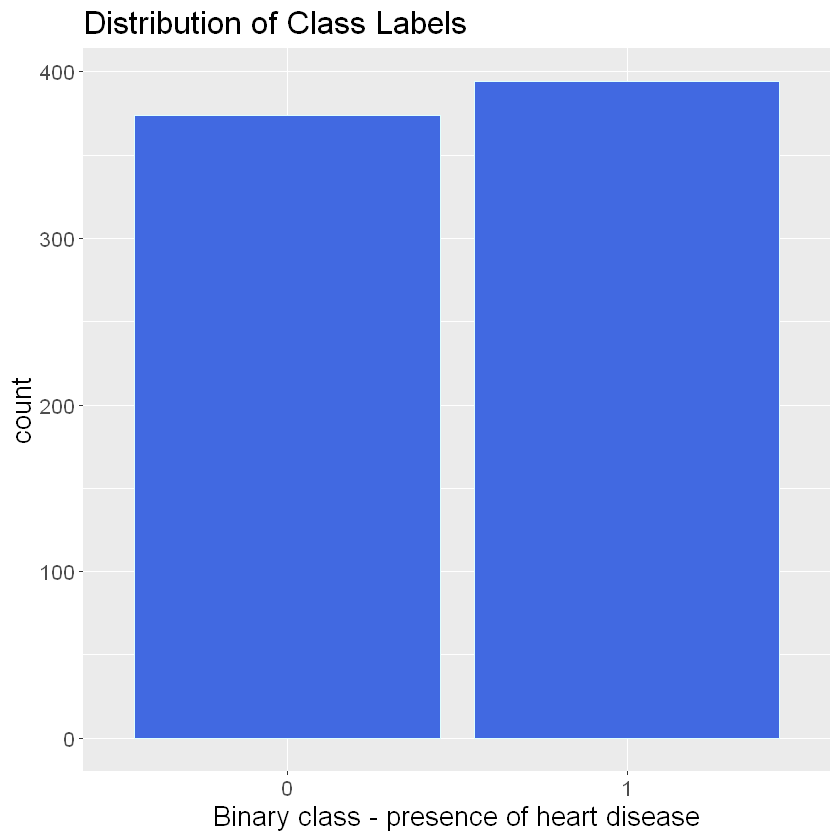

In [6]:
# number of people with heart disease vs no heart disease in the training dataset.
heart_target_groups <- heart_training |>
    group_by(target) |>
    summarize(n=n())
print("Number of observations in group 0 (no heart disease) and group 1 (heart disease)")
heart_target_groups
heart_training2 <- heart_training |>
    mutate(target = as.numeric(target))
class_plot <- ggplot(heart_training, aes(x = target)) + 
    geom_bar(fill = 'royalblue', color = '#e0ffff') +
    labs(x = "Binary class - presence of heart disease") + 
    ggtitle("Distribution of Class Labels") + 
    theme(text = element_text(size = 16)) 
class_plot

From here we will show some preliminary summary statistics of the predictor variables.

In [7]:
#predictors average 
heart_predictors_avg <- heart_training |>
    summarise(
        mean_age = mean(age, na.rm = TRUE),
        mean_trestbps = mean(trestbps, na.rm = TRUE),
        mean_chol = mean(chol, na.rm = TRUE)
    )
print("The average of some of the predictor variables")

heart_predictors_avg

[1] "The average of some of the predictor variables"


mean_age,mean_trestbps,mean_chol
<dbl>,<dbl>,<dbl>
54.42578,131.8828,246.5508


#### Preliminary Summary - Chest Pain

cp,count,description
<dbl>,<int>,<chr>
0,371,Typical Angina
1,129,Atypical Angina
2,215,Non-angina Pain
3,53,Asymptomatic


Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


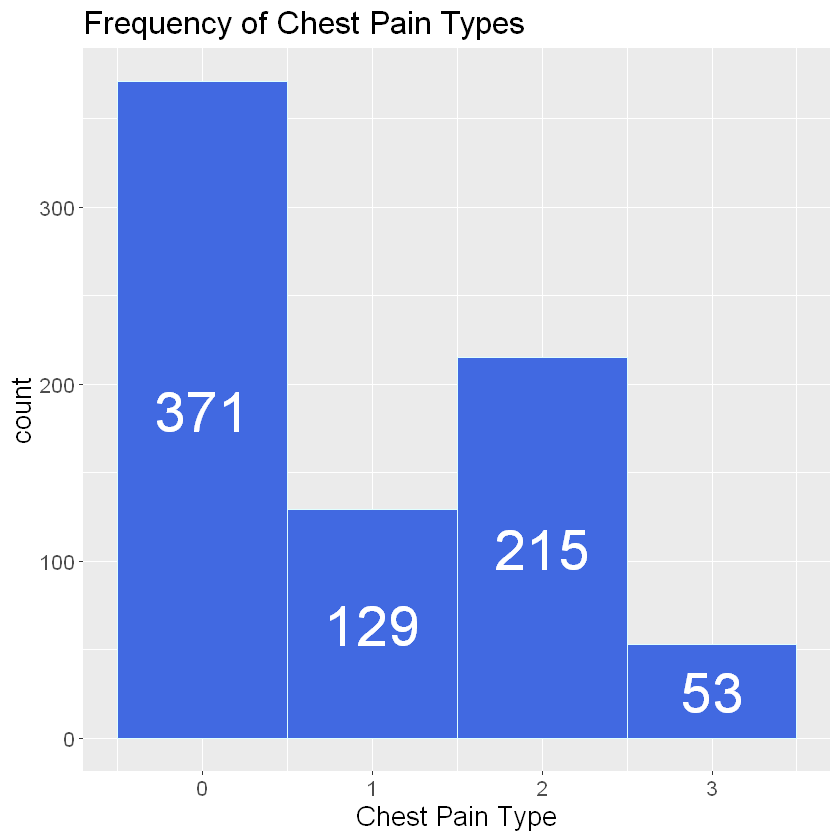

In [8]:
chest_pain_count <- heart_training |>
    group_by(cp) |>
    summarize(count = n()) |>
    mutate(description = c("Typical Angina", "Atypical Angina", "Non-angina Pain", "Asymptomatic"))
chest_pain_count

chest_pain_freq <- ggplot(heart_training, aes(x = cp)) + 
    geom_histogram(binwidth = 1, color = '#e0ffff', fill = 'royalblue') + 
    labs(x = "Chest Pain Type") + 
    theme(text = element_text(size = 16)) +
    ggtitle("Frequency of Chest Pain Types") +
    stat_bin(binwidth=1, geom='text', color='white', aes(label=..count..),
             position=position_stack(vjust = 0.5), size = 12)
chest_pain_freq

#### Preliminary Summary - Sex

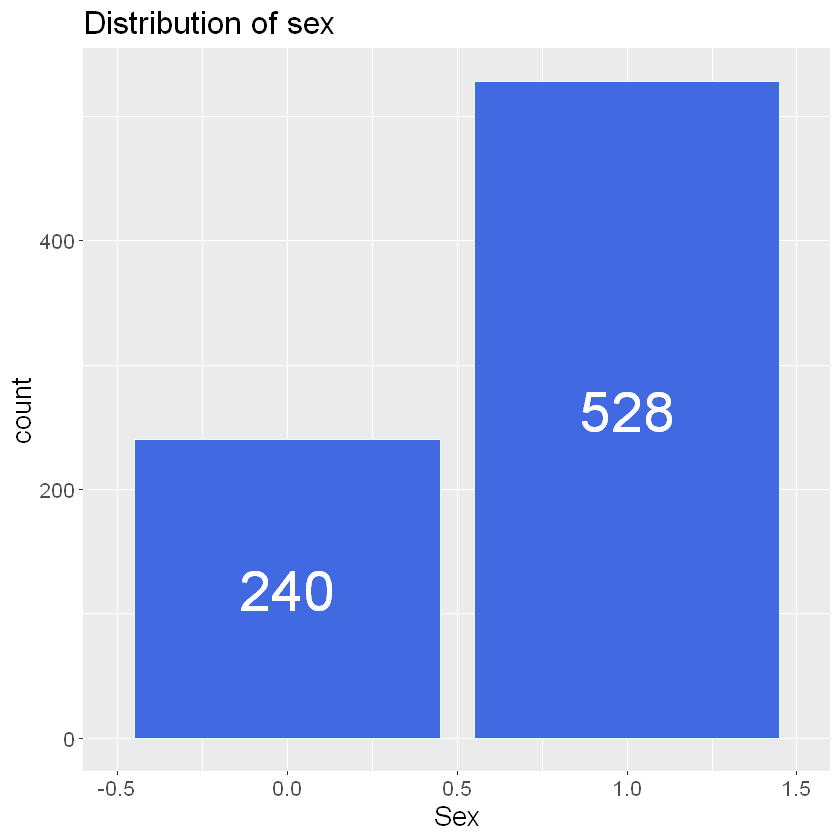

In [9]:
#using an average for categorical sex variable does not make sense, therefore I used count
sex_count <- heart_training |>
    group_by(sex) |>
    summarize(count = n()) |>
    mutate(description = c("Female","Male"))

sex_count_plot <- ggplot(heart_training, aes(x = sex)) + 
    geom_bar(color = '#e0ffff', fill = 'royalblue') + 
    labs(x = "Sex") + 
    ggtitle("Distribution of sex") + 
    theme(text = element_text(size = 16)) +
    stat_bin(binwidth=1, geom='text', color='white', aes(label=..count..),
             position=position_stack(vjust = 0.5), size = 12)
sex_count_plot

#### Preliminary Summary - Cholesterol

mean_chol,min_chol,max_chol
<dbl>,<dbl>,<dbl>
246.5508,126,564


[1] "Distribution of cholesterol levels of all patients - vertical line shows the mean"


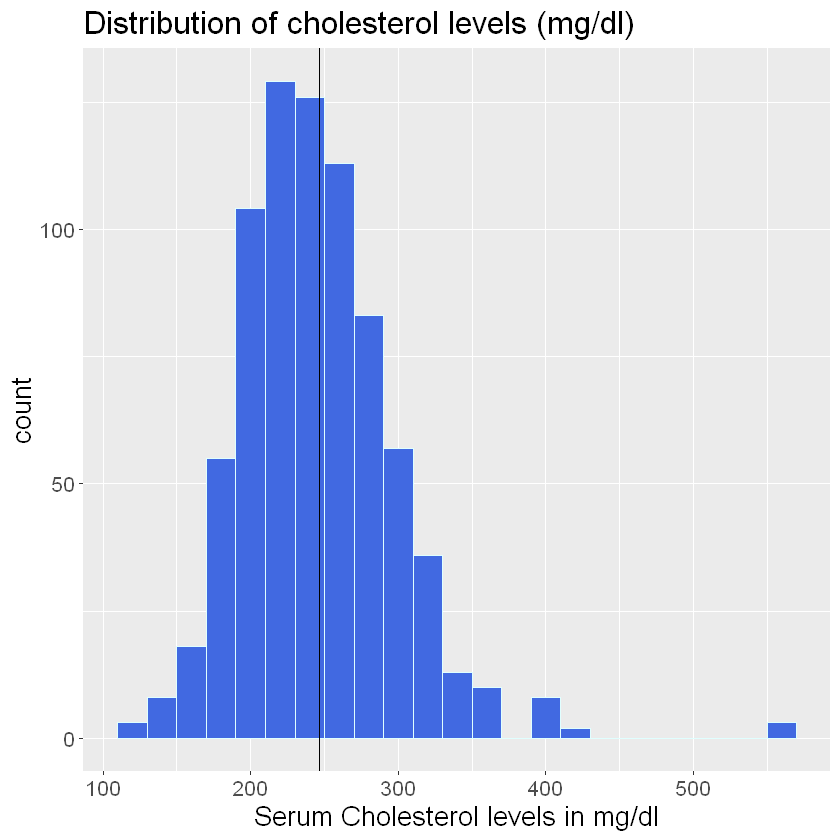

In [10]:
#cholesterol detailed summary
chol_summary <- heart_training |>
summarise (mean_chol = mean(chol, na.rm = TRUE),
           min_chol = min(chol, na.rm = TRUE),
           max_chol = max(chol, na.rm = TRUE))
chol_summary

print("Distribution of cholesterol levels of all patients - vertical line shows the mean")
chol_dist_all <- heart_training |>
    ggplot(aes(x = chol)) + 
    geom_histogram(binwidth = 20, fill = 'royalblue', color = '#e0ffff') + 
    labs(x = "Serum Cholesterol levels in mg/dl") + 
    ggtitle("Distribution of cholesterol levels (mg/dl)") + 
    geom_vline(xintercept = 246.5508) +
    theme(text = element_text(size = 16)) 

chol_dist_all

[1] "Distribution of cholesterol levels by label"


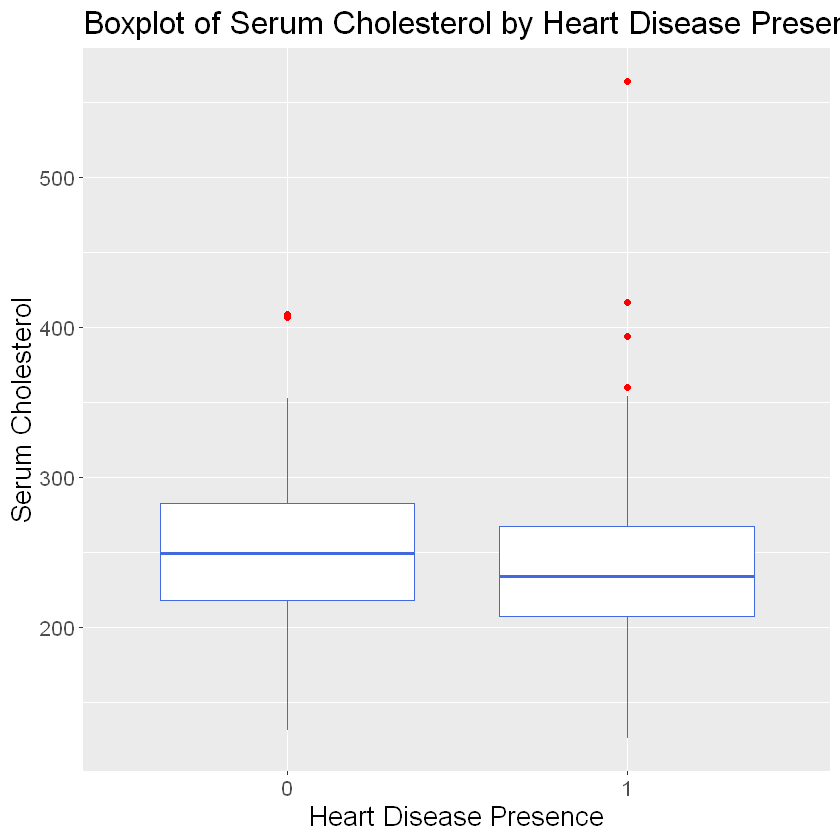

In [11]:
print("Distribution of cholesterol levels by label")
chol_plot <- heart_training |>
ggplot(aes(x = factor(target), y = chol)) + 
    geom_boxplot(outlier.colour = 'red', color = 'royalblue', fill = 'white') +
    labs(x = "Heart Disease Presence", 
         y = "Serum Cholesterol",
         title = "Boxplot of Serum Cholesterol by Heart Disease Presence") + 
    theme(text = element_text(size = 16)) 

chol_plot

In the above box plot, the boxes display the interquartile range (IQR) and the whiskers are 1.5 * IQR. 

#### Preliminary Summary - Resting Blood Pressure

mean_trestbps,min_trestbps,max_trestbps
<dbl>,<dbl>,<dbl>
131.8828,94,200


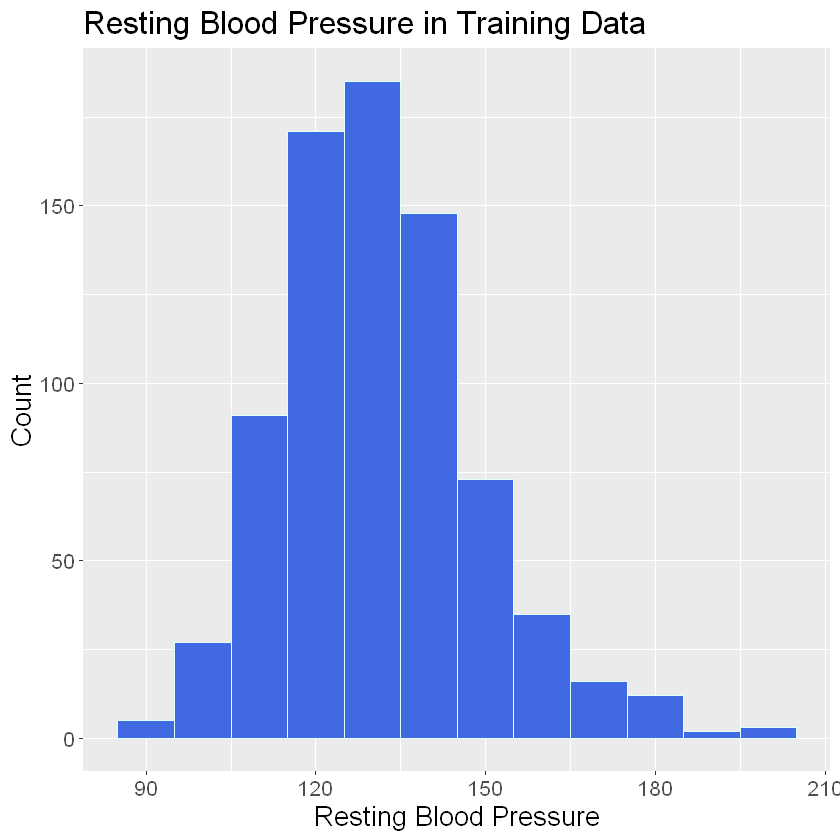

In [12]:
#Resting blood pressure detailed summary
trestbps_summary <- heart_training |>
    summarise(mean_trestbps = mean(trestbps, na.rm = TRUE),
    min_trestbps = min(trestbps, na.rm = TRUE),
    max_trestbps = max(trestbps, na.rm = TRUE) )

trestbps_summary

bp_hist <- heart_training |>
    ggplot(aes(x=trestbps)) +
    geom_histogram(binwidth = 10, color = '#e0ffff', fill = 'royalblue') +
    labs(x = "Resting Blood Pressure", y = "Count", title = "Resting Blood Pressure in Training Data") +
    theme(text = element_text(size = 16)) 

  
bp_hist

#### Preliminary Summary - Age

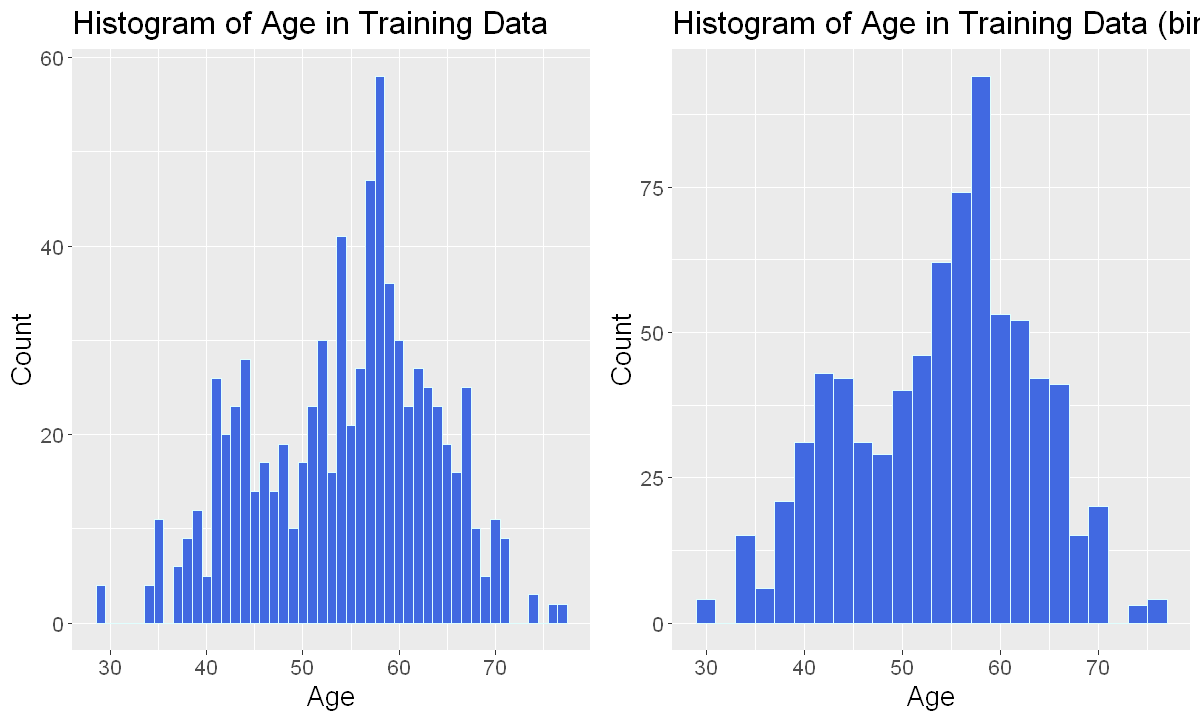

In [13]:
options(repr.plot.width = 10, repr.plot.height = 6)

age_hist <- heart_training |>
    ggplot(aes(x=age)) +
    geom_histogram(binwidth = 1, fill = 'royalblue', color = '#e0ffff') +
    labs(x = "Age", y = "Count", title = "Histogram of Age in Training Data") + 
    theme(text = element_text(size = 16))
age_hist_bin2 <- heart_training |>
    ggplot(aes(x = age)) + 
    geom_histogram(binwidth = 2, fill = 'royalblue', color = '#e0ffff') + 
    labs(x = "Age", y = "Count", title = "Histogram of Age in Training Data (binwidth = 2)") + 
    theme(text = element_text(size = 16))
  
cowplot::plot_grid(age_hist, age_hist_bin2, ncol = 2)

Most of the patients seem to be around age 55-60, but the distribution in age is bimodal, (as more visible in the binwidth = 2 plot) with the second peak at ~45 years old.

### METHODS:

Utilizing Jupyter Notebook and R, we will import the Heart Disease dataset from the UCI repository using the read.csv() function. Our analysis centers on 14 clinical attributes, with the "target" field serving as our response variable. This published dataset has been used in many previous studies, all of which have resulted in the use of the abouve 14 features. Therefore, rather than spending time on redundant feature selection, we decided it would be more worthwhile to use those 14 features, and look into which features may be more strongly correlated with clinical outcome.

The 14 features are as below:  
1. age
2. sex 
3. cp (chest pain type)
4. trestbps (resting blood pressure in mmHg on admission to hospital) 
5. chol (serum cholesterol in mg/dl)
6. fbs (fasting blood sugar; binary (0/1) for condition fasting blood sugar > 120 mg/dl)
7. restecg (resting ElectroCardioGraphic (ECG) results) (0 - normal; 1 - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
8. thalach (maximum heart rate achieved)
9. exang (exercise induced angine (binary 0/1)
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope (the slope of the peak exercise ST segment 1 - upsloping; 2 - flat; 3 - downsloping)
12. ca (number of major vessels (0-3) colored by fluorosopy
13. thal (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. num (diagnosis of heart disease 0/1; 0 - <50% diameter narrowing; 1 - >50% diameter narrowing)

Initial steps involve data cleaning to rectify missing, inconsistent entries and removing incorrect variables with imputation techniques as necessary. Post-cleaning, we undertake Exploratory Data Analysis (EDA) involving summary statistics and visualizations, providing insights into variable distributions and relationships with heart disease presence.

A classification algorithm will be employed for predictive modeling, trained on a data subset, and evaluated via cross-validation.

The predictive accuracy of our model will be visualized via a confusion matrix and Receiver Operating Characteristic (ROC) curve. Additionally, a feature importance plot will emphasize the most predictive variables. All steps are executed within the Jupyter notebook environment to ensure replicability.

### EXPECTED OUTCOMES AND SIGNIFICANCE: 

Machine learning is becoming increasingly popular in the medical field, and many researchers and clinicians are interested in building an accurate prediction model for particular diseases based on clinical features. Although reliable prediction models are helpful in creating tailored treatment plans for patients, the exploratory analysis and validation process of building a classifier may be helpful in uncovering the biological mechanism of the disease itself. For example, certain clinical features may be more strongly correlated with clinical outcome. This may raise questions such as how certain variables play into the pathology of the disease, leading to further experimental questions. 

### DATA ANALYSIS

In [14]:
set.seed(20)
#Creating the recipe
heart_recipe <- recipe(target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal, 
                       data = heart_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
heart_recipe



── Recipe ──────────────────────────────────────────────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 13



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [15]:
set.seed(20) #Do not remove

#Creating a K tune for training data
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors=tune()) |>
    set_engine("kknn")|>
    set_mode("classification")

#Specifiying the amount of K
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

heart_vfold <- vfold_cv(heart_training, v = 10, strata = target)

#Training the model
knn_results <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples=heart_vfold, grid=k_vals) |>
    collect_metrics()

In [16]:
head(knn_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9882591,10,0.004554809,Preprocessor1_Model01
1,roc_auc,binary,0.9883498,10,0.004581775,Preprocessor1_Model01
2,accuracy,binary,0.9882591,10,0.004554809,Preprocessor1_Model02
2,roc_auc,binary,0.9846918,10,0.005054841,Preprocessor1_Model02
3,accuracy,binary,0.9233131,10,0.007708773,Preprocessor1_Model03
3,roc_auc,binary,0.9736321,10,0.004378235,Preprocessor1_Model03


In [17]:
#Checking Accuracies
accuracies <- knn_results |>
    filter(.metric == "accuracy")

roc_auc <- knn_results |>
    filter(.metric == "roc_auc")

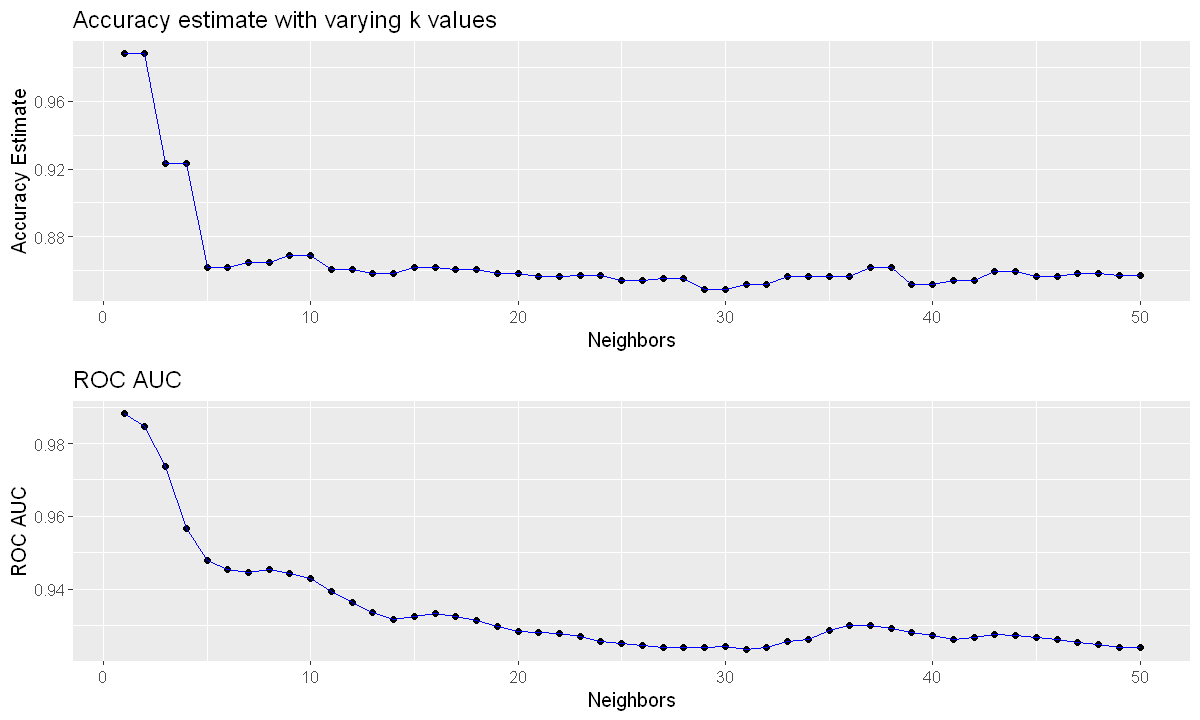

In [18]:
set.seed(20)
#Plotting Accuracies
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() + 
    geom_line(color = 'blue') +
    labs(x = "Neighbors", y = "Accuracy Estimate") + 
    theme(text = element_text(size = 12)) + 
    ggtitle("Accuracy estimate with varying k values") 


roc_auc_vs_k <- ggplot(roc_auc, aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line(color = 'blue') + 
    labs(x = "Neighbors", y = "ROC AUC") + 
    theme(text = element_text(size = 12)) + 
    ggtitle("ROC AUC") 

cowplot::plot_grid(accuracy_vs_k, roc_auc_vs_k, nrow = 2)

Although ROC AUC was outside the scope of the `datasciencebook.ca` textbook, the accuracy estimate alone seemed to be inconclusive. So as additional information, the ROC AUC was also plotted to see if any `k` values were 'better' than others.  

The k range from `k = 1` to `k = 5` show high accuracies and ROCs, but because this is a high-dimensional (many features/variables), we thought that k values that are too low may be subject to overfitting, and thus not as reliable. Ultimately we settled on `k = 3` and `k = 9`. We decided to explore the model with `k = 9` as the ROC curve shows a slight increase from `k = 5`, and there is a local maxima at `k = 9` on the accuracy estimate plot as well. We decided to use `k = 3` as it has a high accuracy, and we cannot say for sure it is overfit (at the moment). `k = 2` was left out since it has the exact same accuracy as `k = 1` (we considered this may also be overfit).

Create instances of the model for further investigation.

In [19]:
#let's choose k=3 and k=9 and fit them onto the testing set
set.seed(20)
#Specifying the k for our model
knn_spec3 <- nearest_neighbor(weight_func = "rectangular", neighbors=3) |>
    set_engine("kknn")|>
    set_mode("classification")

knn_spec9 <- nearest_neighbor(weight_func = "rectangular", neighbors=9) |>
    set_engine("kknn")|>
    set_mode("classification")

In [20]:
set.seed(20)
#Fitting the models onto the training set
knn_fit3 <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec3) |>
    fit(data = heart_training)

#This workflow is for k=9 (comment it if you do not need it)
knn_fit9 <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec9) |>
    fit(data = heart_training)

In [21]:
set.seed(20)
#Predicting process
heart_test_predictions3 <- predict(knn_fit3, heart_testing) |>
    bind_cols(heart_testing)

heart_test_predictions9 <- predict(knn_fit9, heart_testing) |>
    bind_cols(heart_testing)

#glimpse(heart_test_predictions3)
#glimpse(heart_test_predictions9)

In [22]:
# Accuracy of the prediction of K=3 model on the testing set
heart_test_predictions3 |>
    metrics(truth = target, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9494163


We see that the accuracy is 94.9% with `k = 3`.

In [23]:
heart_test_predictions9 |>
    metrics(truth = target, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8754864


The accuracy of the model with `k = 9` is 87.5%

### Validation/Reality Check

In the above sections, it seems that `k = 3` is the best `k` parameter, and `k = 9` is the second best parameter. However, small values of `k` are subject to overfitting. Let's first begin by taking a closer look at the data and performance.

In [24]:
negative.group3 <- heart_test_predictions3[heart_test_predictions3$target == 0, c("target", ".pred_class")]
positive.group3 <- heart_test_predictions3[heart_test_predictions3$target == 1, c("target", ".pred_class")]

negative.group.accuracy3 <- negative.group3 |>
    filter(negative.group3$.pred_class == 0) |>
    nrow()
positive.group.accuracy3 <- positive.group3 |>
    filter(positive.group3$.pred_class == 1) |>
    nrow()

negative.group.accuracy3 <- negative.group.accuracy3/nrow(negative.group3)
positive.group.accuracy3 <- positive.group.accuracy3/nrow(positive.group3)

print("For k = 3:")
print(paste("Heart disease negative group accuracy:", negative.group.accuracy3))
print(paste("Heart disease positive group accuracy:", positive.group.accuracy3))

[1] "For k = 3:"
[1] "Heart disease negative group accuracy: 0.984"
[1] "Heart disease positive group accuracy: 0.916666666666667"


In [25]:
negative.group9 <- heart_test_predictions9[heart_test_predictions9$target == 0, c("target", ".pred_class")]
positive.group9 <- heart_test_predictions9[heart_test_predictions9$target == 1, c("target", ".pred_class")]

negative.group.accuracy9 <- negative.group9 |>
    filter(negative.group9$.pred_class == 0) |>
    nrow()
positive.group.accuracy9 <- positive.group9 |>
    filter(positive.group9$.pred_class == 1) |>
    nrow()

negative.group.accuracy9 <- negative.group.accuracy9/nrow(negative.group9)
positive.group.accuracy9 <- positive.group.accuracy9/nrow(positive.group9)

print("For k = 9")
print(paste("Heart disease negative group accuracy:", negative.group.accuracy9))
print(paste("Heart disease positive group accuracy:", positive.group.accuracy9))

[1] "For k = 9"
[1] "Heart disease negative group accuracy: 0.88"
[1] "Heart disease positive group accuracy: 0.871212121212121"


In [26]:
random_labels <- round(runif(n = nrow(heart_data), min = 0, max = 1),0)

In [27]:
# we will call the new dataset p.heart_data for 'permutation testing heart dataset'
p.heart_data <- cbind(heart_data, random_labels) |>
    mutate(random_labels = as_factor(random_labels))

In [28]:
head(p.heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,random_labels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1


We will repeat the training and evaluation using `k = 3` to see if the model has learned something better than random guessing.

In [29]:
set.seed(20) #Do not remove
p.heart_split <- initial_split(p.heart_data, prop = 0.75, strata = random_labels)
p.heart_training <- training(p.heart_split)
p.heart_testing <- testing(heart_split)

p.knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors=tune()) |>
    set_engine("kknn")|>
    set_mode("classification")

p.heart_recipe <- recipe(random_labels ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal,
                         data = p.heart_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

#Specifiying the amount of K
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

p.heart_vfold <- vfold_cv(p.heart_training, v = 10, strata = target)

#Training the model
knn_results <- workflow() |>
    add_recipe(p.heart_recipe) |>
    add_model(p.knn_tune) |>
    tune_grid(resamples=p.heart_vfold, grid=k_vals) |>
    collect_metrics()

In [30]:
#Checking Accuracies
p.accuracies <- knn_results |>
  filter(.metric == "accuracy")

p.roc_auc <- knn_results |>
    filter(.metric == "roc_auc")

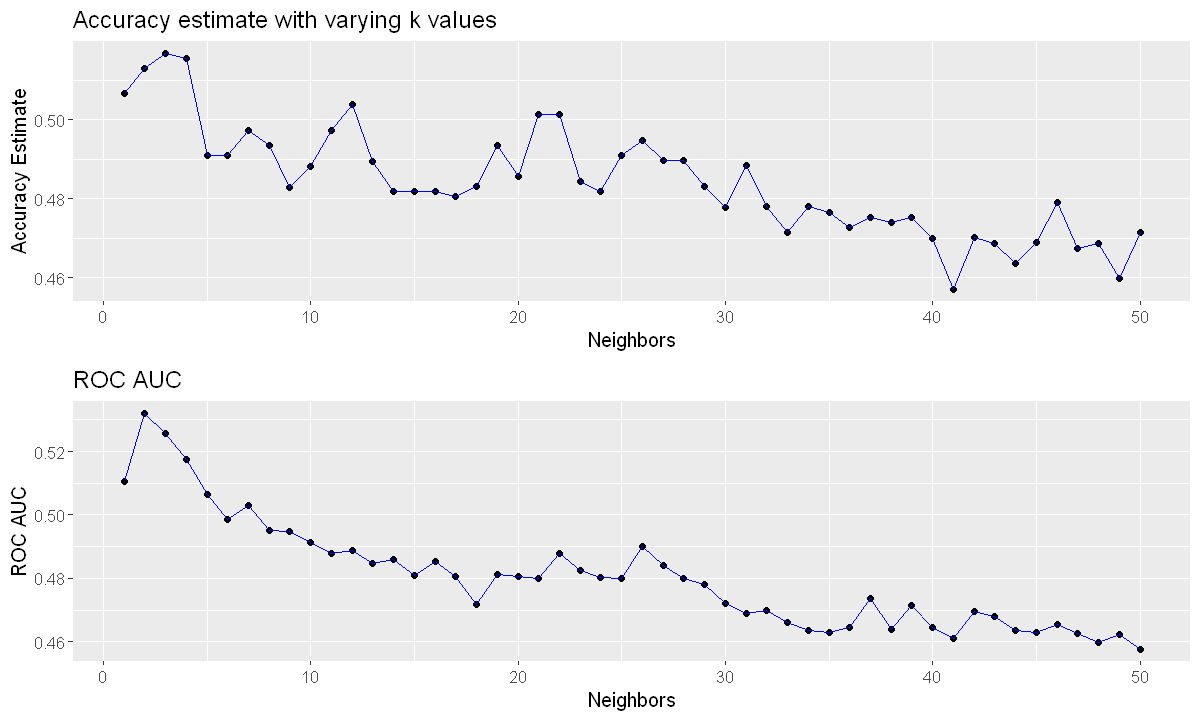

In [31]:
set.seed(20)
#Plotting Accuracies
p.accuracy_vs_k <- ggplot(p.accuracies, aes(x = neighbors, y = mean)) +
    geom_point() + 
    geom_line(color = 'blue') +
    labs(x = "Neighbors", y = "Accuracy Estimate") + 
    theme(text = element_text(size = 12)) + 
    ggtitle("Accuracy estimate with varying k values") 

p.roc_auc_vs_k <- ggplot(p.roc_auc, aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line(color = 'blue') + 
    labs(x = "Neighbors", y = "ROC AUC") + 
    theme(text = element_text(size = 12)) + 
    ggtitle("ROC AUC") 

cowplot::plot_grid(p.accuracy_vs_k, p.roc_auc_vs_k, nrow = 2)

If the model is overfitting, (as in, learning very specifically to the data, and not the overall general pattern), then the model should still perform with high accuracy with randomized labels. However, we see that this is not the case. This may indicate that the KNN classifier is identifying patterns in the data which are relevant to the class label. This testing is based on the paper [Permutation Tests for Studying Classifier Performance](https://www.jmlr.org/papers/volume11/ojala10a/ojala10a.pdf).

#### Identifying the Best 3 Predictors

The [curse of dimensionality](https://link.springer.com/referenceworkentry/10.1007/978-1-4899-7687-1_192) is a well known phenomenon in machine learning, where distance metrics such as euclidean distance (rectangular weight function in the knn classifier) break down, as the addition of more features causes the differences (and similarities between each feature between observations to be more 'dilute'. Thus it is important to find a good set of predictors, both for the sake of machine learning, and for the clinical research problem. We will look at the top 3 features which give the best predictions (as individual features).

In [32]:
feature.names <- colnames(heart_data |> select(-target))

In [33]:
measures <- tibble(feat_name = character(),
                   accuracy.measure = numeric())

for (i in 1:length(feature.names)) {
    knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
        set_engine("kknn") |>
        set_mode("classification")
    
    k.vfold <- vfold_cv(heart_training, v = 5, strata = target)
    feature <- feature.names[[i]]
    k.recipe <- recipe(as.formula(paste0("target","~",feature)), data = heart_training) 
    
    k.fit <- workflow() |>
        add_recipe(k.recipe) |>
        add_model(knn_spec) |>
        fit(heart_training)
    
    predictions <- predict(k.fit, heart_testing) |>
        cbind(heart_testing)
    accuracy <- predictions |> 
        metrics(truth = target, estimate = .pred_class) |>
        filter(.metric == 'accuracy') |>
        pull(.estimate)
    measures <- measures |>
        add_row(feat_name = feature, 
                accuracy.measure = accuracy)
}

In [34]:
top3 <- measures |>
    arrange(desc(measures$accuracy.measure)) |>
    slice(1:3)

In [35]:
top3

feat_name,accuracy.measure
<chr>,<dbl>
chol,0.7509728
thalach,0.6303502
trestbps,0.5408560


The three features that give the highest accuracies (when used alone as the predictor) are `chol`, `thalach`, and `trestbps`.

Just because a feature performs (relatively) better than others when it is the sole predictor variable, does not mean it is among the best features to use when used in conjunction with other features. To identify which features (used together) are best for this classification, a feature selection process should be done such as forward feature selection.